# Temperatura ambiente: GaSb

Variabili:
- tempo della singola acquisizione [0e1, 0e5, 0e9, 0e25]
- numero di prese dati [1, 2, 3, 5, 8, 15]
- filtro utilizzato [0e01pc, 0e05pc, 0e1pc, ...]
- fenditura

Fissi:
- 300K
- 35lmm (grating)
- .asc (formato file)
- 1064nm (lambda laser eccitazione)

## Importazioni

In [8]:
from qp2_subroutines import *
import os

In [9]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Analisi

In [10]:
arr_filtri_GaSb = ['0e01pc', '0e0125pc', '0e05pc', '0e1pc', '0e5pc', '1pc', '2e5pc', '5pc']

In [11]:
def build_name_GaSb (filtro: str, T='300K', lmm='35lmm'):
    # t_acq == 0e1
    # n_acq == 5
    # grating == 35lmm
    # ecc=None, fen=None
    
    cartella = 'data/T_room_300K_pGe_e_GaSb/'
    name = 'Giak_' + '0e1_5_' + T + '_' + filtro + '_GaSb_35lmm.asc'
    
    return cartella+name

## GaSb su INTENSITÀ

#### Contenitore per i dati

In [12]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb = {}

#### Lettura file

In [13]:
for filtro in arr_filtri_GaSb:
    
    # Costruisco nome file
    name = build_name_GaSb (filtro=filtro)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # PRE-pulisco i counts da valori insensati nelle regioni esterne
    counts = pre_clean_counts (counts, n_primi=90, n_ultimi=180, rep=10)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts, n=1)
    # Raccolgo
    GaSb[filtro] = (waveln, counts)

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - -

#### Plot + Fit Gauss

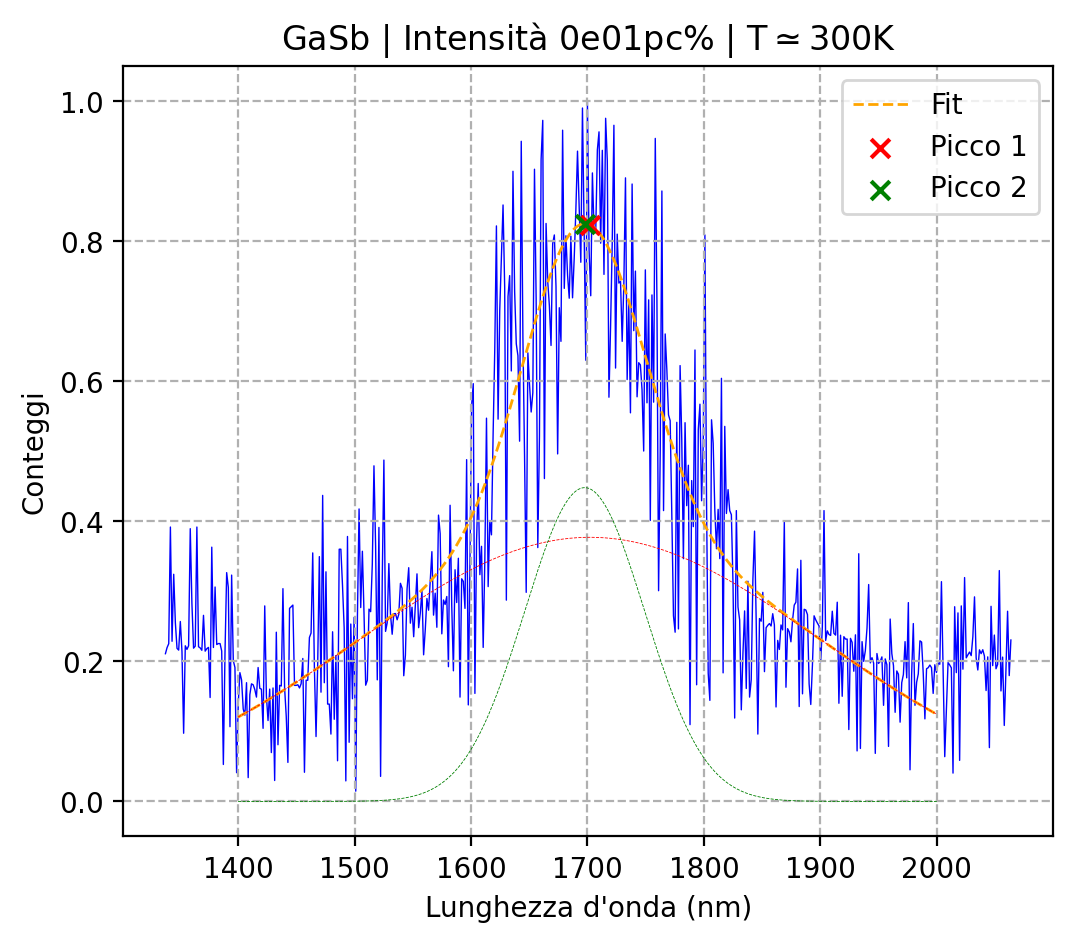

• Gaussiana  1
 - A = 0.377362916376315
 - mu = 1702.1723591273912
 - sigma = 199.99999999999883
• Gaussiana  2
 - A = 0.4482707147821004
 - mu = 1697.6635813637056
 - sigma = 51.491171449133994
 - chi2rid = 9.347145223412383


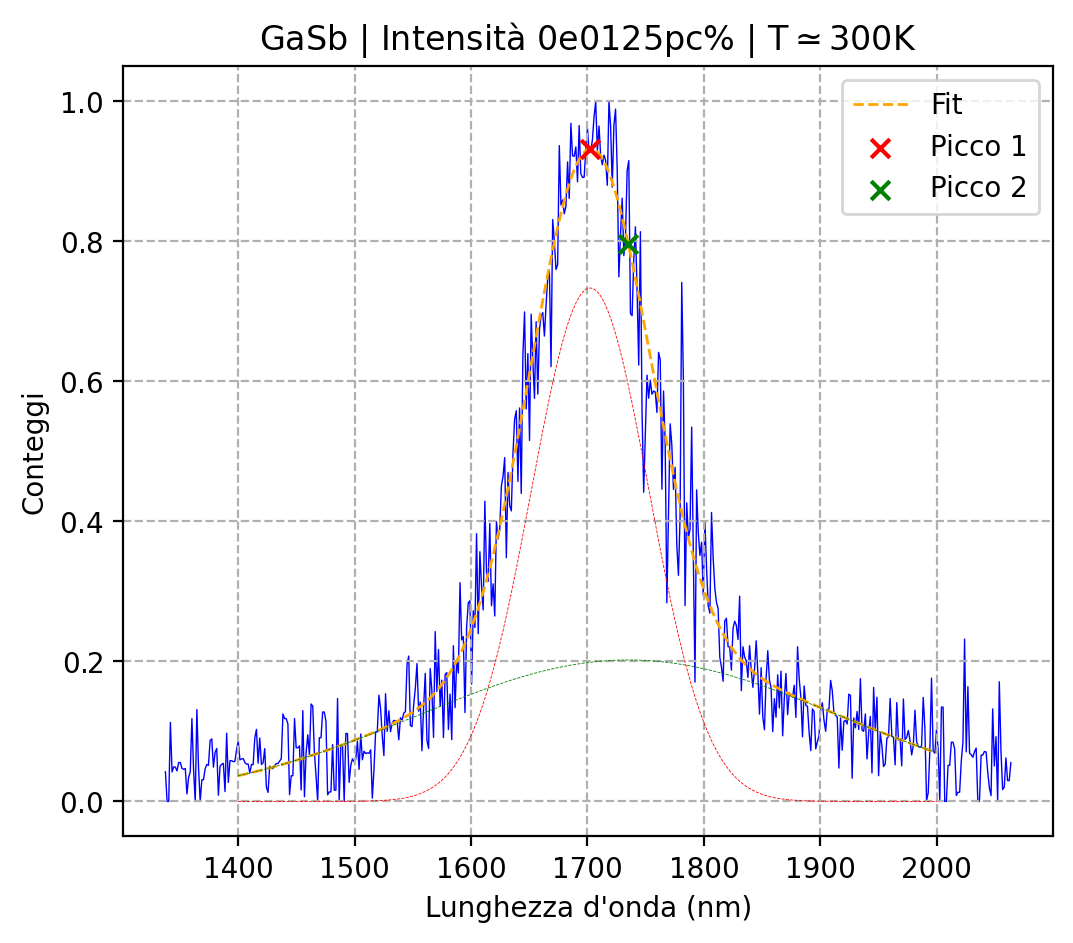

• Gaussiana  1
 - A = 0.7334261804424084
 - mu = 1702.3714447713298
 - sigma = 50.45814025768514
• Gaussiana  2
 - A = 0.20208163826688746
 - mu = 1735.1651406318906
 - sigma = 181.47099458897947
 - chi2rid = 5.929970162314944
Fit non riuscito: ritento
Fit non riuscito nuovamente!
Aggiunta di gaussiane interrotta


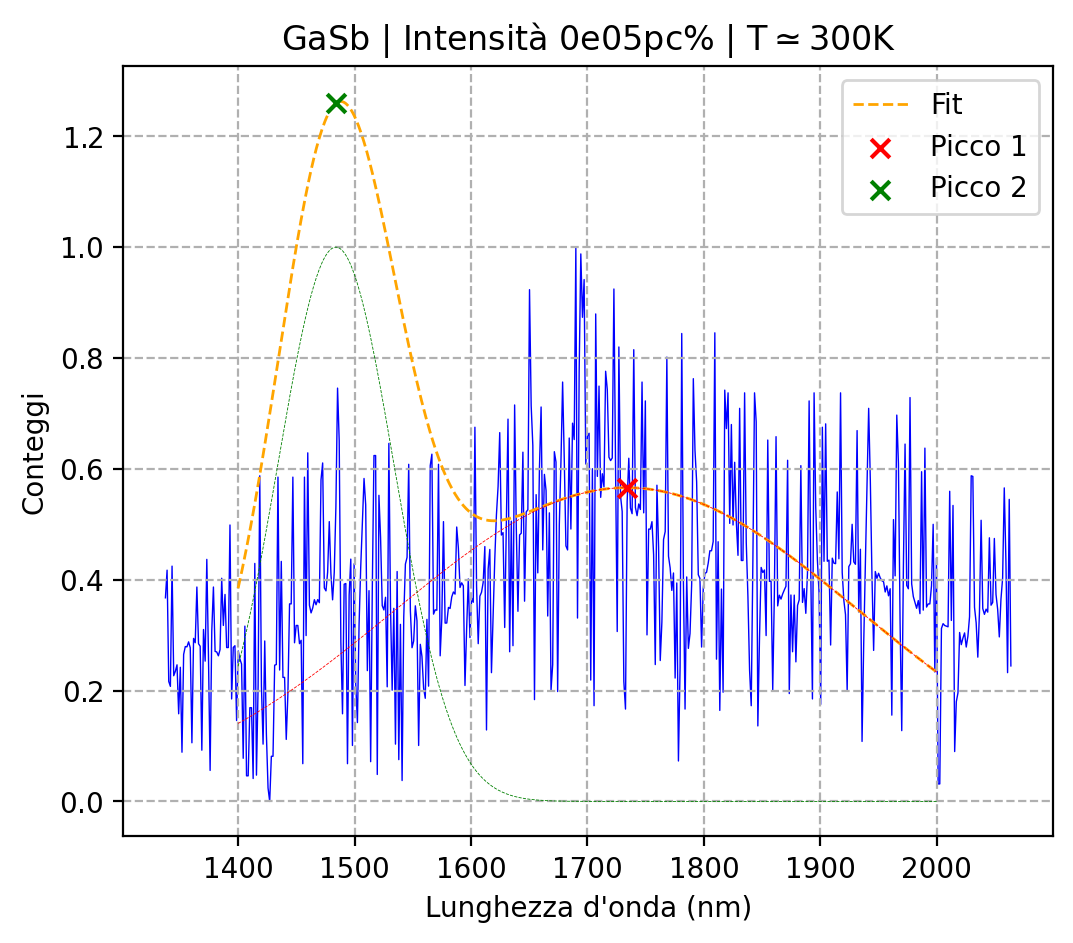

• Gaussiana  1
 - A = 0.5661088526904953
 - mu = 1733.7033699964973
 - sigma = 199.9999999999993
• Gaussiana  2
 - A = 1.0
 - mu = 1483.9926
 - sigma = 50.0
 - chi2rid = 18.152782596644006


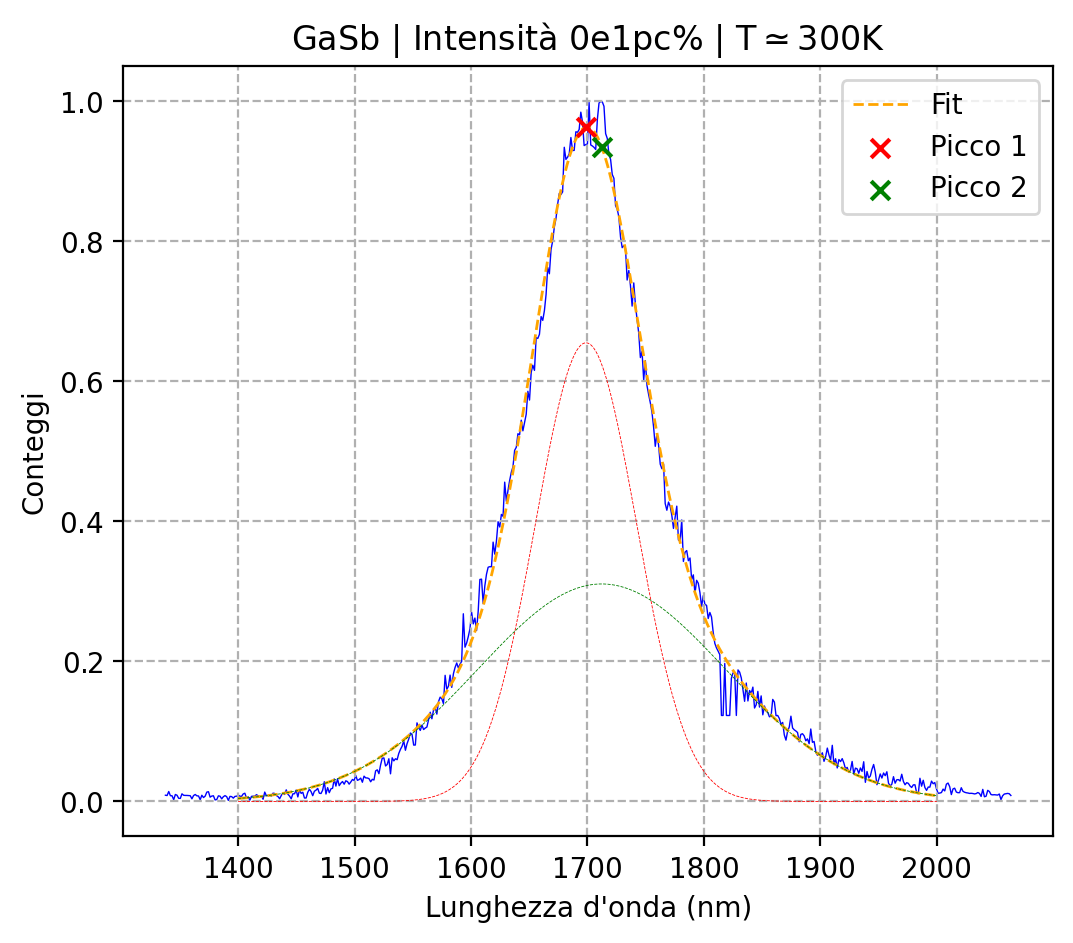

• Gaussiana  1
 - A = 0.6551969845812249
 - mu = 1698.7935286399263
 - sigma = 43.382976324760314
• Gaussiana  2
 - A = 0.3107155766680233
 - mu = 1712.2747210634957
 - sigma = 106.63606724849976
 - chi2rid = 0.5385367699509396


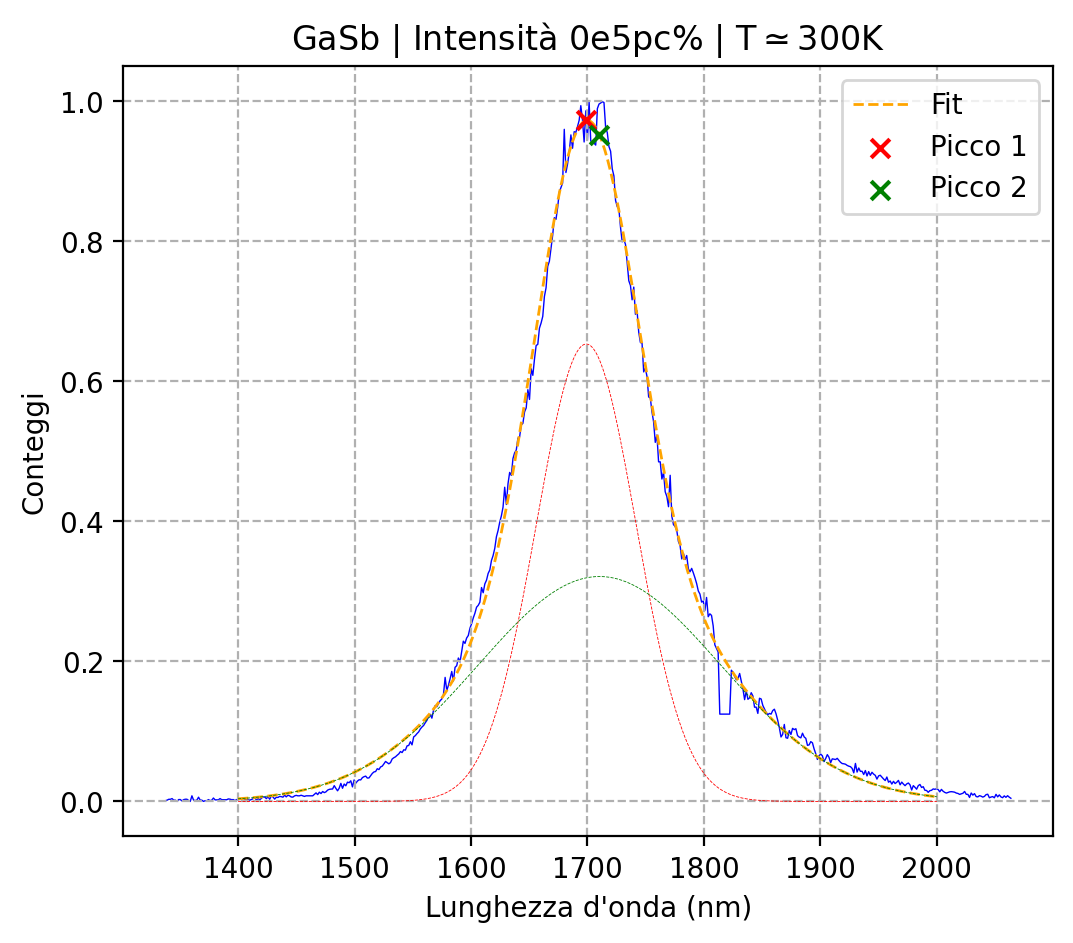

• Gaussiana  1
 - A = 0.6534279433659096
 - mu = 1698.9786762906338
 - sigma = 42.77612242644123
• Gaussiana  2
 - A = 0.32134178615886005
 - mu = 1710.330846979572
 - sigma = 104.13594187839075
 - chi2rid = 0.5293235262098607


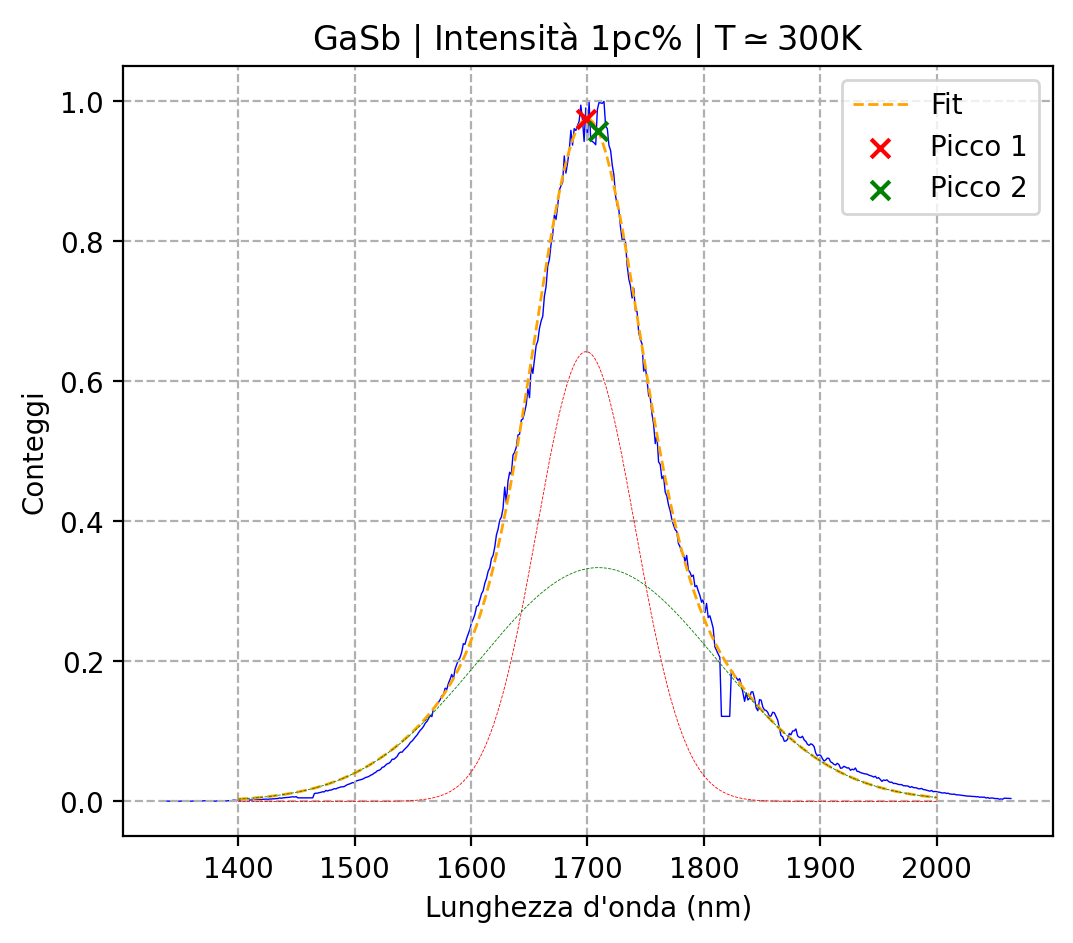

• Gaussiana  1
 - A = 0.6425731457990601
 - mu = 1698.8988090194287
 - sigma = 42.29102421282864
• Gaussiana  2
 - A = 0.3340415424023459
 - mu = 1709.3008049967607
 - sigma = 101.86876908381446
 - chi2rid = 0.5617632391056396


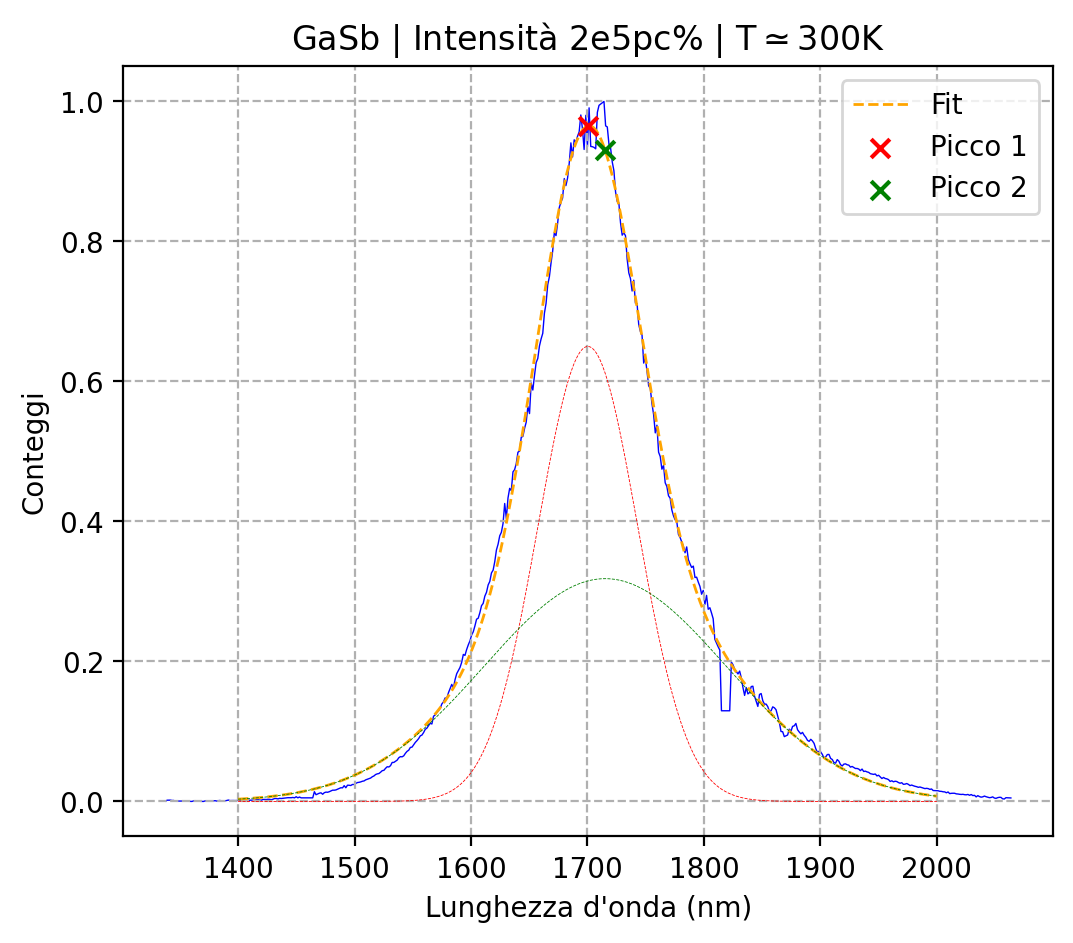

• Gaussiana  1
 - A = 0.6499907947033997
 - mu = 1700.3614510053483
 - sigma = 42.70145987765083
• Gaussiana  2
 - A = 0.3182799828682939
 - mu = 1715.2129121391506
 - sigma = 104.06441448406643
 - chi2rid = 0.5208223251908051


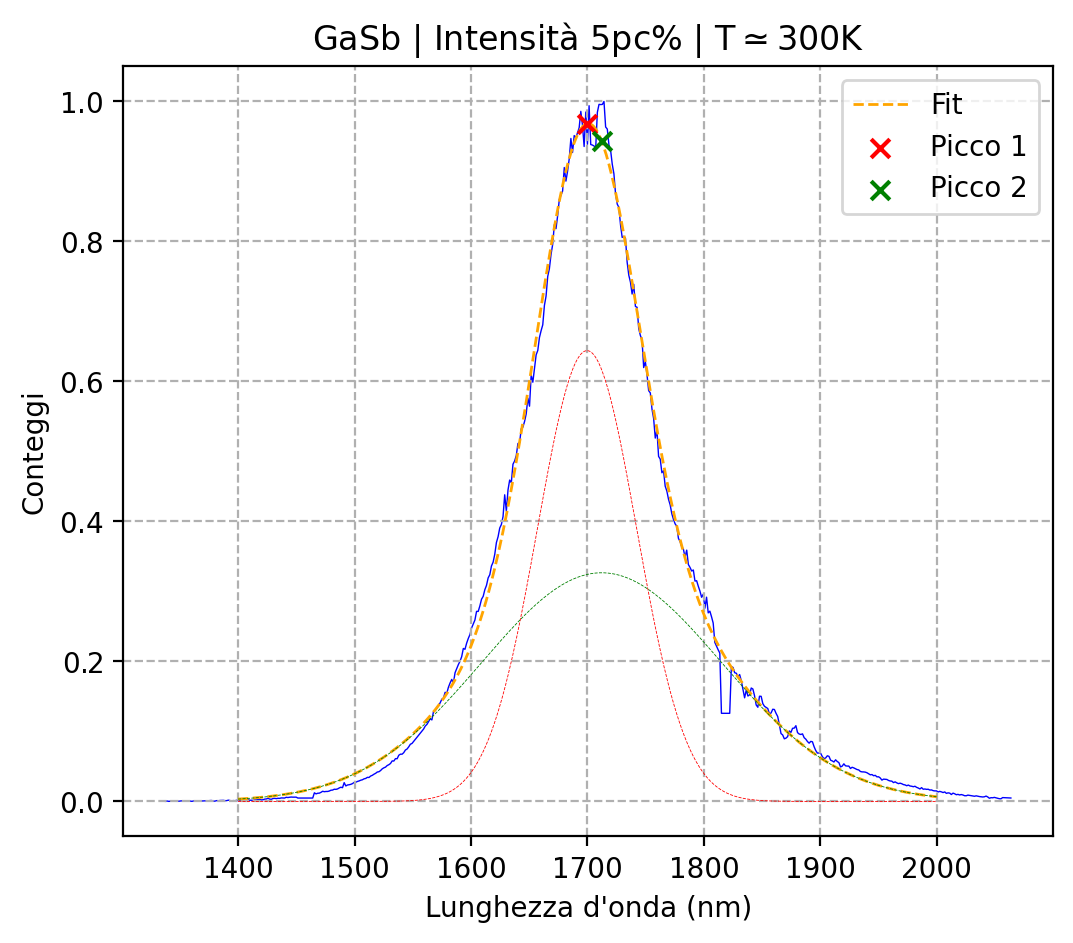

• Gaussiana  1
 - A = 0.6440130615712768
 - mu = 1699.6829751518678
 - sigma = 42.52693221734945
• Gaussiana  2
 - A = 0.32669141071129476
 - mu = 1712.2038998383268
 - sigma = 103.18546575104803
 - chi2rid = 0.5509736390244712


In [14]:
for filtro in arr_filtri_GaSb:
    
    waveln = GaSb[filtro][0]
    counts = GaSb[filtro][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    
    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1700, 50)
    ]
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=2)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 500)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
        
    # plotto i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        # questo dà come ordinata al marker il valore della gaussiana in quella x
        y_picco = N_gaussiane(x_picco, *popt)
        # questo invece gli dà l'ampiezza del picco estratta dal fit (è orribile)
        # y_picco = popt[3*i]
        
        plt.scatter(x_picco, y_picco, 
                    color=col[i], 
                    marker='x',
                    label='Picco '+str(i+1),
                    s=45,
                    zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità ' + filtro + '% | T$\simeq300$K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)


---

---